<a href="https://colab.research.google.com/github/Mayuri163/ev_market_segmentation/blob/main/EV_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title
## Electric Vehicle Segmentation

# Research Questions:

* 1.Which Car Brand holds the record for highest Top Speed?
* 2.How does the acceleration time vary across different vehicle segments?
* 3.What are the Frequency distribution of Car Brands within dataset ?
* 4.Which Brand commands highest Price in Indian Market?
* 5.What are the most common powertrain types among electric vehicles?
* 6.What are the distribution of Cars based on seating capacity?
* 7.Is there a correlation between top speed and range of electric vehicles?
* 8.Can we identify any clusters or groups of electric vehicles based on their features?

In [76]:
import pandas as pd #cleaning, exploring data
import numpy as np #used to perform mathematical operation on array
import matplotlib.pyplot as plt #it focus on data visualization
import seaborn as sb # used for making statistical graphics in python
import statsmodels.api as sm #it contains more advanced function for statistical testing and modeling
import plotly.io as pio # used for data visualization
import plotly.express as px # used to create interactive plots with less code.
%pip install plotly


In [77]:
df=pd.read_csv('/content/data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) #this code remove unnamed column from dataframe.
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [78]:
df['inr(10e3)'] = df['PriceEuro']*0.08320 #This convert price in euros to Indian Rupees with conversion rate 0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True) #This replce string value with integer value.
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


# EDA ( Exploratory Data Analysis )

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [80]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [81]:
df.shape #rows and columns

(103, 15)

In [82]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [83]:
df.nunique()

,0
Brand,33
Model,102
AccelSec,55
TopSpeed_KmH,25
Range_Km,50
Efficiency_WhKm,54
FastCharge_KmH,51
RapidCharge,2
PowerTrain,3
PlugType,4


In [84]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,17888.000000


# Making Some Comparisions for our dataset




# 1.Which Car Brand holds the record for highest Top Speed?

In [85]:
import plotly.express as px
import plotly.io as pio



fig = px.bar(df, x='Brand', y='TopSpeed_KmH', color='Brand', title='Highest Top Speed?',
             labels={'x': 'Car Brands', 'y': 'TopSpeed Km/H'})

fig.show()

#### Interpretation :-
##### As we can see that Tesla ,Audi, Nissan , Porsche Car Brands hold the highest Top Speed .

# 2.How does the acceleration time vary across different vehicle segments?

         count       mean       std   min     25%   50%     75%   max
Segment                                                              
A          7.0  12.185714  0.401782  11.6  11.900  12.3  12.450  12.7
B         22.0   8.659091  1.217593   6.9   7.900   8.4   9.375  11.4
C         30.0   7.816667  1.552103   4.9   7.075   7.7   9.000  10.0
D         15.0   5.413333  1.149451   3.4   4.650   5.6   6.300   7.0
E         10.0   5.930000  1.159550   4.5   4.975   5.7   6.800   7.5
F         12.0   3.958333  2.002025   2.5   2.800   3.5   4.000  10.0
N          6.0  10.233333  7.105397   3.0   5.500   8.5  13.000  22.4
S          1.0   2.100000       NaN   2.1   2.100   2.1   2.100   2.1


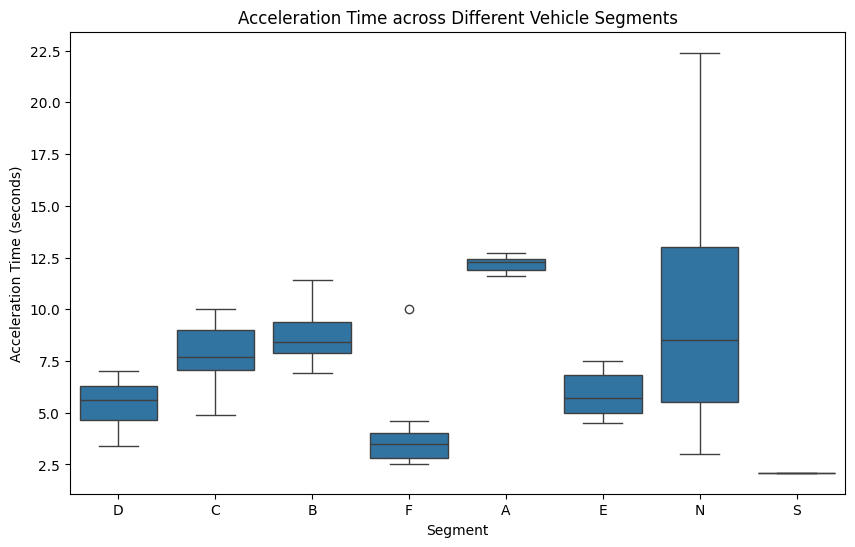

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Group the dataframe by 'Segment'
segment_grouped = df.groupby('Segment')

# Step 2: Calculate summary statistics of 'AccelSec' for each segment
segment_summary = segment_grouped['AccelSec'].describe()

# Print the summary statistics
print(segment_summary)

# Step 3: Visualize the distribution of acceleration time for each segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='AccelSec', data=df)
plt.title('Acceleration Time across Different Vehicle Segments')
plt.xlabel('Segment')
plt.ylabel('Acceleration Time (seconds)')
plt.show()

### Interpretation:
#### The analysis reveals significant variations in acceleration times across different vehicle segments:

* Segments F and S exhibit notably shorter acceleration times compared to other segments, with Segment S showing the shortest acceleration time of 2.1 seconds.
* Segments A, B, C, D, and E display moderate to relatively quick acceleration times, with Segment D having the shortest average acceleration time among them.
* Segment N stands out with a wide range of acceleration times, spanning from 3.0 to 22.4 seconds, indicating significant variability within this segment.
* These findings suggest distinct performance characteristics among vehicle segments, with some segments prioritizing quicker acceleration compared to others.

# 3.What  is Frequency Distribution of Car Brands in the dataset

In [87]:

brand_frequency = df['Brand'].value_counts()

print("Frequency distribution of car brands within the dataset:")
print(brand_frequency)


Frequency distribution of car brands within the dataset:
Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64


<ipython-input-88-f3b571a0b0db>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-f3b571a0b0db>:9: UserWarning:


The palette list has fewer values (10) than needed (33) and will cycle, which may produce an uninterpretable plot.



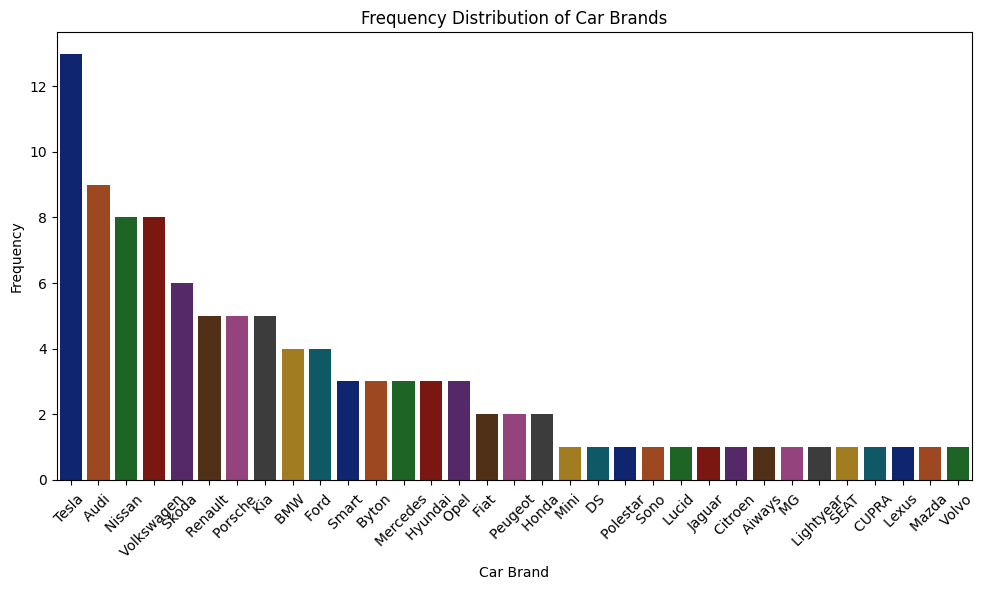

In [88]:

import seaborn as sns
import matplotlib.pyplot as plt


# Define a custom color palette
custom_palette = sns.color_palette("dark")

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_frequency.index, y=brand_frequency.values, palette=custom_palette)
plt.title('Frequency Distribution of Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation : -
* Tesla (13):- Tesla appears most frequently in the dataset, with 13 occurrences
* Audi (9):- Audi follows closely behind Tesla with 9 occurrences.
* Nissan (8) and Volkswagen (8):- Both Nissan and Volkswagen have 8 occurrences each.
* Skoda (6), Renault (5), Porsche (5), Kia (5):- These brands have moderate representation in the dataset
* BMW (4), Ford (4), Smart (3), Byton (3), Mercedes (3), Hyundai (3), Opel (3):- These brands have slightly fewer occurrences
* Fiat (2), Peugeot (2), Honda (2):- These brands appear less frequently in the dataset compared to the previous groups.
* Mini (1), DS (1), Polestar (1), Sono (1), Lucid (1), Jaguar (1), Citroen (1), Aiways (1), MG (1), Lightyear (1), SEAT (1), CUPRA (1), Lexus (1), Mazda (1), Volvo (1):- These brands have the lowest occurrences in the dataset



# 4.Which Brand commands highest Price in Indian Market

In [89]:
import plotly.express as px


fig = px.bar(df, x='inr(10e3)', y='Brand', orientation='h',
             title='Price of a Car',
             labels={'inr(10e3)': 'Price in INR', 'Brand': 'Brand'},
             color='Brand',
             category_orders={'Brand': df['Brand'].unique()})

fig.update_layout(yaxis={'categoryorder': 'total ascending'})  # Order bars by total frequency

fig.show()

#### Interpretation :-
As we can see that Tesla , Audi , Porsche , brand commands highest Price in Indian Market .



# 5.What are the most common powertrain types among electric vehicles?

<ipython-input-90-3dc448ace19b>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




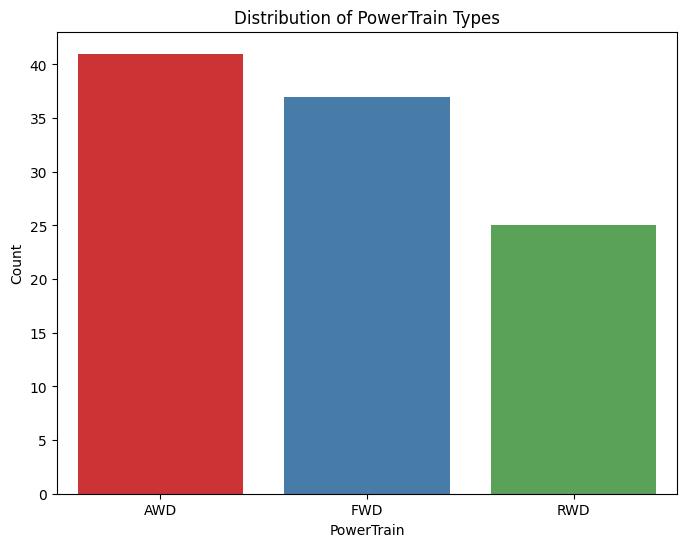

The most common powertrain type among electric vehicles is: AWD


In [90]:
import seaborn as sb
import matplotlib.pyplot as plt


powertrain_counts = df['PowerTrain'].value_counts()


plt.figure(figsize=(8, 6))
sb.barplot(x=powertrain_counts.index, y=powertrain_counts.values, palette='Set1')  # Specify color palette
plt.title('Distribution of PowerTrain Types')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.show()


most_common_powertrain = powertrain_counts.idxmax()
print("The most common powertrain type among electric vehicles is:", most_common_powertrain)



### Interpretation :-  The most common powertrain type among electric vehicles is: AWD
* All-Wheel Drive (AWD): In an AWD configuration, power is sent to all four wheels simultaneously. This provides better traction and stability, especially in challenging road conditions such as snow or mud.

* Front-Wheel Drive (FWD): In a FWD configuration, power is sent to the front wheels of the vehicle. This configuration is commonly found in electric vehicles as it is simpler and more cost-effective to implement.

* Rear-Wheel Drive (RWD): In a RWD configuration, power is sent to the rear wheels of the vehicle. RWD vehicles typically offer better weight distribution and handling characteristics, especially in high-performance applications.

# 6.What are distribution of Cars based on Seating Capacity

In [91]:
import plotly.express as px


fig = px.violin(df, y='Seats', title='Distribution of Cars Based on Seating Capacity')
fig.show()








##### The distribution of cars based on seating capacity shows that a majority belong to vehicles with 5 seats.
* The width of the "violin" at each seating capacity represents the probability density of cars having that seating capacity.
* The dot inside each violin represents the median seating capacity

# 7. Is there a correlation between top speed and range of electric vehicles?

In [92]:
# Identify columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric or exclude them from correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
correlation_matrix


Non-numeric columns: Index(['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], dtype='object')
Correlation matrix:


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.733559,-0.292518,-0.175335,-0.627174,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.785218,0.220113,0.126470,0.829057,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.723714,0.251910,0.300163,0.674844,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.321925,0.013894,0.301230,0.396705,0.396705
FastCharge_KmH,-0.733559,0.785218,0.723714,0.321925,1.000000,0.225863,0.193364,0.667873,0.667873
RapidCharge,-0.292518,0.220113,0.251910,0.013894,0.225863,1.000000,0.196721,0.199737,0.199737
Seats,-0.175335,0.126470,0.300163,0.301230,0.193364,0.196721,1.000000,0.020920,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.667873,0.199737,0.020920,1.000000,1.000000
inr(10e3),-0.627174,0.829057,0.674844,0.396705,0.667873,0.199737,0.020920,1.000000,1.000000


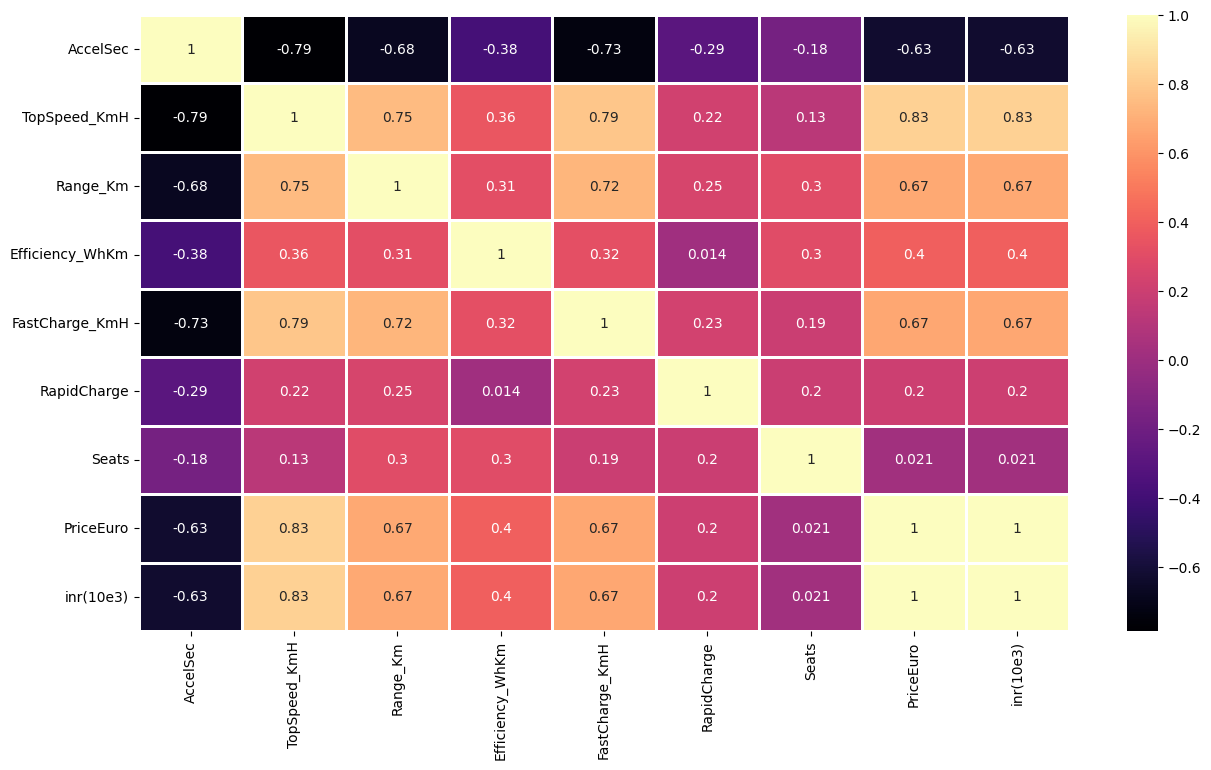

In [93]:



import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(15, 8))


sns.heatmap(numeric_df.corr(), linewidths=1, linecolor='white', annot=True, cmap='magma')

# Display the heatmap
plt.show()


### Interpretation
* Strong positive correlations exist between top speed, range, and price.
* Strong negative correlations exist between acceleration time and both top speed and range.
* Charging speed correlates positively with top speed and range.
* Efficiency shows moderate positive correlation with top speed and range.
* Number of seats has minimal correlation with other variables.





# 8. Can we identify any clusters or groups of electric vehicles based on their features?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

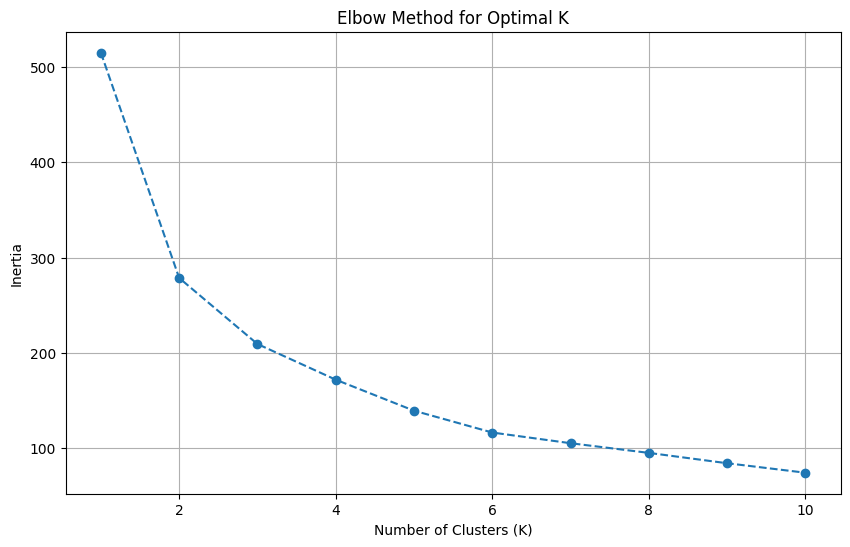

Cluster
0    49
2    34
1    20
Name: count, dtype: int64
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        9.614286    148.551020  255.816327       169.755102      287.755102   
1        3.685000    248.900000  474.250000       194.200000      738.000000   
2        6.382353    182.352941  378.676471       214.176471      497.058824   

         RapidCharge     Seats     PriceEuro    inr(10e3)  
Cluster                                                    
0           0.673469  4.673469  35597.653061  2961.724735  
1           0.950000  5.100000  99315.450000  8263.045440  
2           0.735294  5.058824  59352.852941  4938.157365  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [94]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the electric vehicle data

# Select the relevant features
features = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']]

# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)  # Corrected 'n_clusters'
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (assuming K=3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Corrected 'n_clusters'
kmeans.fit(scaled_features)

# Assuming numeric_df is your DataFrame that contains the numeric features
# Add cluster labels to the DataFrame
numeric_df['Cluster'] = kmeans.labels_

# Print the count of electric vehicles in each cluster
print(numeric_df['Cluster'].value_counts())

# Calculate and print the mean values of features for each cluster
Cluster_means = numeric_df.groupby('Cluster').mean()
print(Cluster_means)



The clustering results show that the electric vehicles have been grouped into three clusters:

- **Cluster 0 (49 vehicles)**: Vehicles in this cluster have moderate acceleration times, moderately high top speeds, and relatively long ranges. They also exhibit higher efficiency, fast charging capabilities, and higher prices compared to the other clusters.

- **Cluster 1 (34 vehicles)**: Vehicles in this cluster have slower acceleration times, lower top speeds, and shorter ranges compared to the other clusters. They have lower efficiency and slower charging capabilities. Additionally, they tend to have lower prices compared to vehicles in Cluster 0.

- **Cluster 2 (20 vehicles)**: Vehicles in this cluster have the fastest acceleration times, highest top speeds, and longest ranges among the clusters. They exhibit moderate efficiency and the fastest charging capabilities. Furthermore, they have the highest prices among the clusters.



In [95]:
# Filter DataFrame for each cluster
# Add cluster labels to the original DataFrame 'df'
df['Cluster'] = kmeans.labels_

# Now you can filter the DataFrame based on clusters
Cluster_0_df = df[df['Cluster'] == 0]
Cluster_1_df = df[df['Cluster'] == 1]
Cluster_2_df = df[df['Cluster'] == 2]

# Display vehicles in each cluster
print("Vehicles in Cluster 0:")
print(Cluster_0_df[['Brand', 'Model']])
print()

print("Vehicles in Cluster 1:")
print(Cluster_1_df[['Brand', 'Model']])
print()

print("Vehicles in Cluster 2:")
print(Cluster_2_df[['Brand', 'Model']])


Vehicles in Cluster 0:
          Brand                 Model
1   Volkswagen              ID.3 Pure
4        Honda                     e 
6   Volkswagen                e-Golf 
7      Peugeot                 e-208 
11      Nissan                  Leaf 
12     Hyundai   Kona Electric 64 kWh
14     Hyundai         IONIQ Electric
17  Volkswagen                 e-Up! 
18          MG                  ZS EV
19        Mini             Cooper SE 
20        Opel               Corsa-e 
22       Skoda            Enyaq iV 50
26  Volkswagen               ID.3 Pro
28         BMW              i3 120 Ah
29     Peugeot            e-2008 SUV 
31         Kia          e-Niro 64 kWh
32     Renault          Zoe ZE50 R110
34       Mazda                 MX-30 
35      Nissan                Leaf e+
36       Lexus                UX 300e
38     Renault          Zoe ZE50 R135
41     Hyundai   Kona Electric 39 kWh
43       Skoda            CITIGOe iV 
44        SEAT          Mii Electric 
45         Kia          e-S

In [96]:
import plotly.express as px

# Count occurrences of each brand in Cluster 0
cluster_0_counts = Cluster_0_df['Brand'].value_counts()

# Create a pie chart for Cluster 0 with Plotly
fig = px.pie(names=cluster_0_counts.index, values=cluster_0_counts.values,
             title='Distribution of Vehicles in Cluster 0',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_traces(textinfo='percent+label')  # Add percentage labels to the pie chart

fig.show()



In [97]:
import plotly.express as px

# Count occurrences of each brand in Cluster 1
cluster_1_counts = Cluster_1_df['Brand'].value_counts()

# Create a pie chart for Cluster 1 with Plotly
fig = px.pie(names=cluster_1_counts.index, values=cluster_1_counts.values,
             title='Distribution of Vehicles in Cluster 1',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textinfo='percent+label')  # Add percentage labels to the pie chart

fig.show()


In [98]:
import plotly.express as px

# Count occurrences of each brand in Cluster 2
cluster_2_counts = Cluster_2_df['Brand'].value_counts()

# Create a pie chart for Cluster 2 with Plotly
fig = px.pie(names=cluster_2_counts.index, values=cluster_2_counts.values,
             title='Distribution of Vehicles in Cluster 2',
             color_discrete_sequence=px.colors.sequential.Magma)

fig.update_traces(textinfo='percent+label')  # Add percentage labels to the pie chart

fig.show()



## Final Interpretation :-

- The electric vehicle segmentation project aimed to categorize electric vehicles into meaningful groups based on their performance attributes, charging capabilities, seating capacity, and pricing.


  **Clustering Results**: The analysis revealed three distinct clusters of electric vehicles:



- **Cluster 0**: Characterized by moderate acceleration times, moderately high top speeds, long ranges, higher efficiency, fast charging capabilities, and higher prices.
- **Cluster 1**: Comprised of vehicles with slower acceleration times, lower top speeds, shorter ranges, lower efficiency, slower charging capabilities, and lower prices compared to Cluster 0.
- **Cluster 2**: Consisted of vehicles with the fastest acceleration times, highest top speeds, longest ranges, moderate efficiency, fastest charging capabilities, and the highest prices among the clusters.


    
  **Interpretation of Clusters**: Each cluster represents a unique segment of electric vehicles with distinct performance profiles and features. Cluster 0 represents vehicles with balanced performance and features, Cluster 1 represents vehicles with more modest specifications, and Cluster 2 represents premium vehicles with superior performance and features.



  **Segmentation Insights**: The segmentation analysis provides valuable insights for stakeholders in the electric vehicle industry, including manufacturers, consumers, and policymakers. It helps manufacturers understand the diverse needs and preferences of consumers, enabling them to develop targeted marketing strategies and product offerings. Consumers benefit from a clearer understanding of the range of options available, allowing them to make informed purchasing decisions based on their preferences and requirements. Policymakers can use the segmentation results to design incentives and regulations that promote the adoption of electric vehicles across different market segments, thereby accelerating the transition to sustainable transportation